In [1]:
import ete3

In [2]:
tree = ete3.Tree("example.tree", format=1)

In [3]:
# Generates a list of ete3 objects with all possible rootings
roots = []
print(len(tree))
for node in tree.traverse():
    t = tree.copy()
    # Finds leaf names of the subtree
    if node.is_root() or node.up.is_root():
        roots.append(t)
        continue
    elif node.is_leaf():
        og = [node.name]
    else:
        og = [x.name for x in node.get_leaves()]   
    
    # Reroots on subtree leaves
    if len(og) > 1:
        lca = t.get_common_ancestor(og)
        t.set_outgroup(lca)
    else:
        t.set_outgroup(og[0])
    
    # Optimizes root placements
    """c_a, c_b = t.get_children()
    root_len = c_a.dist + c_b.dist
    c_a_dist_to_root = sum([x.get_distance(t) for x in c_a.get_leaves()]) / len(c_a)
    c_b_dist_to_root = sum([x.get_distance(t) for x in c_b.get_leaves()]) / len(c_b)
    diff = c_a_dist_to_root - c_b_dist_to_root
    if diff > 0:
        if diff < root_len:
            extra = (root_len - diff) / 2
            c_a.dist = extra
            c_b.dist = extra + diff
        else:
            c_a.dist = 0.05 * root_len
            c_b.dist = 0.95 * root_len
    if diff < 0:
        diff = abs(diff)
        if diff < root_len:
            extra = (root_len - diff) / 2
            c_a.dist = extra + diff
            c_b.dist = extra
        else:
            c_a.dist = 0.95 * root_len
            c_b.dist = 0.05 * root_len"""

    roots.append(t)

print(len(roots))

150
298


In [4]:
# Calculates an AD score for each possible rooting
n_taxa = len(tree)
ADs = []

for i in range(len(roots)):
    t = roots[i]
    all_leaves = list(t.get_leaves())
    deviations = []
    
    for i in range(n_taxa):
        for j in range(i + 1, n_taxa):
            leaf_b = all_leaves[i]
            leaf_c = all_leaves[j]
            ca = t.get_common_ancestor([leaf_b, leaf_c])
            
            d_ab = ca.get_distance(leaf_b)
            d_bc = leaf_b.get_distance(leaf_c)
            dev = abs((2 * d_ab / d_bc) - 1)
            deviations.append(dev)
            
    AD = (sum([x**2 for x in deviations])/len(deviations))**0.5
    ADs.append(AD)

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

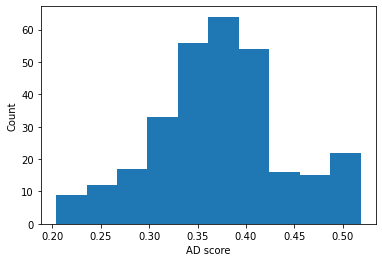

In [6]:
plt.hist(ADs)
plt.xlabel("AD score")
plt.ylabel("Count")

In [7]:
unbalanced = [abs(len(x.get_children()[0]) - len(x.get_children()[1])) for x in roots]

Text(0.5, 0, 'AD score')

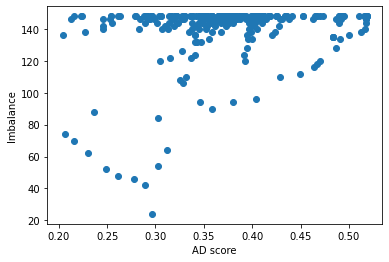

In [8]:
plt.scatter(ADs, unbalanced)
plt.ylabel("Imbalance")
plt.xlabel("AD score")

In [ ]:
print(min(ADs))
lowest_ind = ADs.index(min(ADs))
print(roots[lowest_ind].write(format=1))

In [9]:
t = tree.copy()
nodes = list(t.traverse())
for i in range(len(nodes)):
    node = nodes[i]
    AD = ADs[i]
    if AD < 0.30:
        node.name = str(AD)
    elif not node.is_leaf():
        node.name = ""
        
print(t.write(format=1))

(m|7719|XP_002130040.1:0.186882,((((((((((m|31234|XP_003108577.1:0.008327,m|31234|OZF99276.1:3e-06):1.35143,(m|6334|KRY41164.1:2.01883,m|31234|XP_003088317.1:0.537177):0.144407):0.236845,(m|53326|EYC27775.1:0.095233,m|40348|VDM79982.1:0.362371):0.251473):0.123602,m|6279|XP_001901146.1:0.388429):0.089176,((((((0.2788424543687966:0.394422,((m|6945|XP_029843852.1:0.012595,m|6945|XP_029843850.1:0.002453)0.2986777020849503:0.375121,(m|8030|XP_013996146.1:0.363685,(m|8355|NP_001084901.1:3e-06,m|8355|XP_018087441.1:3e-06):0.258099):0.516297)0.28326283826032295:0.269062)0.2274303432081486:1.4427,0.2157393918494152:1.3428)0.2039721322238825:0.210058,(((0.28793110617799755:0.290433,((0.2964740865416377:0.097174,0.29642107914152704:0.092164)0.2944587194060252:0.027687,0.29483271512010334:0.071165)0.28904866678354635:0.126674)0.24601981848004095:0.932165,(((((((((((((((m|6945|XP_029839301.1:0.032739,m|6945|XP_029843369.1:0.028607):1.9819,b|1827606|PIG77070.1:0.765002):0.179682,b|2058924|WP_1035495